# Visualizing Running Totals with Line Charts
---

These are most commonly seen in xG or shot counts throughout a game.

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# import data and assign it to 'data'

data = pd.read_csv('../csv/E0.csv')

# show top of the data frame
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


## Transform our data into a usable format

Since the data is a match-by-match look at a season, it won't help us much for a line chart. We need our data to be the data that we want to plot - a list of the cumulative totals for each team over the season.

Let's create a list of the unique teams in our data frame. Then we'll create a dictionary that will interate over our teams and give each a list that starts with a 0, as each team obviously starts with 0 points.

In [4]:
# create a list of unique teams from the home team column
teams = data.HomeTeam.unique()

# create a dictionary called team_lists
team_lists = { team : [0] for team in teams }
print(team_lists)

{'Brentford': [0], 'Man United': [0], 'Burnley': [0], 'Chelsea': [0], 'Everton': [0], 'Leicester': [0], 'Watford': [0], 'Norwich': [0], 'Newcastle': [0], 'Tottenham': [0], 'Liverpool': [0], 'Aston Villa': [0], 'Crystal Palace': [0], 'Leeds': [0], 'Man City': [0], 'Brighton': [0], 'Southampton': [0], 'Wolves': [0], 'Arsenal': [0], 'West Ham': [0]}


Now we just need to run through each match to find our who won, and add a new entry into the correct team's list with their points.

We can do this by working through each line of our dataframe, learning who the home and away teams are, then running an if statement to learn the result. Once we know the result, we can add each team's points with the append method.

In [6]:
# for each row in our dataframe:

for row in data.itertuples():
  # add the home and away team names to the correct variable
  home = row.HomeTeam
  away = row.AwayTeam

  # if the home team goals (FTHG column) are higher than the away team goals (FTAG), give correct points
  if row.FTHG > row.FTAG:
    team_lists[home].append(3)
    team_lists[away].append(0)
  
  # if home team is less than away, give correct points
  elif row.FTHG < row.FTAG:
    team_lists[home].append(0)
    team_lists[away].append(3)

  # in any other case (draw), give correct points
  else:
    team_lists[home].append(1)
    team_lists[away].append(1)

Let's check Brentford and Chelsea entries.

In [7]:
print(team_lists['Brentford'])
print(team_lists['Chelsea'])

[0, 3, 1, 1, 0, 3, 1, 3, 0, 0, 0, 0, 1, 3, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 0]
[0, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 3, 3, 3, 3, 0, 3, 0, 3, 1, 0, 1, 3, 1, 3]


So we have appended points, but have done nothign to run these as culumative totals throughout the season.

To achieve this, we need to access the previous game and just add our result to this. We can navigate backwards through a list with a negative value in square brackets.

Let's reset out teams and team_lists so they don't have previous data. With that all cleaned up, we can repeat our for loop, but instead of appending the points, we will append the sum of points and the previous value.

In [8]:
teams = data.HomeTeam.unique()
team_lists = { team: [0] for team in teams}

for row in data.itertuples():
  home = row.HomeTeam
  away = row.AwayTeam

  if row.FTHG > row.FTAG:
    team_lists[home].append(team_lists[home][-1] + 3)
    team_lists[away].append(team_lists[away][-1] + 0)

  elif row.FTHG < row.FTAG:
    team_lists[home].append(team_lists[home][-1] + 0)
    team_lists[away].append(team_lists[away][-1] + 3)

  else:
    team_lists[home].append(team_lists[home][-1] + 1)
    team_lists[away].append(team_lists[away][-1] + 1)

In [9]:
print(team_lists['Brentford'])
print(team_lists['Chelsea'])

[0, 3, 4, 5, 5, 8, 9, 12, 12, 12, 12, 12, 13, 16, 16, 17, 20, 20, 20, 23, 23, 23, 23, 23, 23, 24, 24, 24, 27, 30, 30, 33, 36, 39, 40, 40, 43, 46, 46]
[0, 3, 6, 7, 10, 13, 13, 16, 19, 22, 25, 26, 29, 30, 33, 33, 36, 37, 38, 41, 42, 43, 43, 44, 47, 50, 53, 56, 59, 59, 62, 62, 65, 66, 66, 67, 70, 71, 74]


## Put our data into a basic viz

The `.plot` function in matplotlib ideally takes at least two arguments, the x and y location of each point. The points provide one of the coordinates of each point. We just need to create a list containing numbers 0-38 for our matchdays (0 is the starting point).

We can do this using the range function within the list function. For this, range needs two numbers, the starting number and the end number + 1.

In [10]:
matchday = list(range(0, 39))

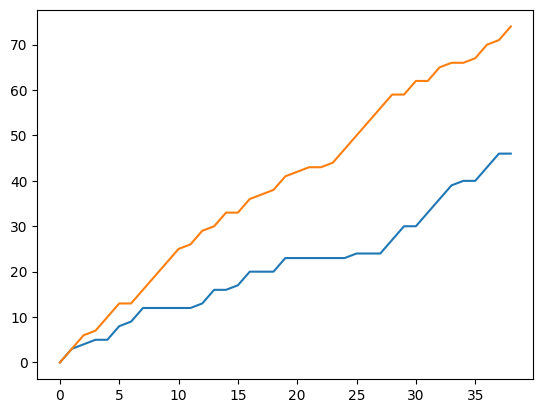

In [11]:
# create a line plot with matchday and teamlist figures for two teams
plt.plot(matchday, team_lists['Brentford'])
plt.plot(matchday, team_lists['Chelsea'])

## Styling the visualization

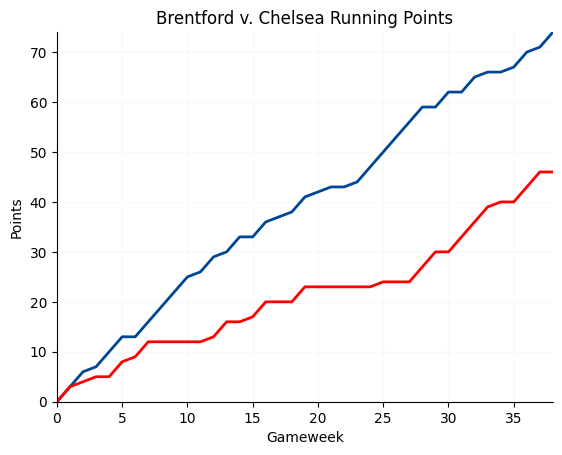

In [13]:
# create the bare bones of what will be our viz
fig, ax = plt.subplots()

# add our data as before, but setting colours and widths of lines
plt.plot(matchday, team_lists['Chelsea'], color = '#004793', linewidth = 2)
plt.plot(matchday, team_lists['Brentford'], color = '#FF0000', linewidth = 2)

# give the axes and plot a title each
plt.xlabel('Gameweek')
plt.ylabel('Points')
plt.title('Brentford v. Chelsea Running Points')

# add a faint grey grid
plt.grid()
ax.xaxis.grid(color = '#f8f8f8')
ax.yaxis.grid(color = '#f9f9f9')

# remove the margins between our lines and the axes
plt.margins(x = 0, y = 0)

# remove the spines of the chart on the top and right sides
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)